# #*Task4*

In [9]:
# import required libraries :

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [15]:
# Read the dataset (we use titanic-parquet.csv)

df = pd.read_csv('amazon_reviews.csv')

In [17]:
df

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09
2,2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09
3,3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09
4,4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09
...,...,...,...,...,...,...,...,...,...,...
994,994,9983891212,"[0, 0]",5.0,A cable runs lifetime. Excellent product that ...,"02 21, 2014",A11QNB7FPVY3V,VESTALIA TORRES,Excellent,1.392941e+09
995,995,9983891212,"[1, 1]",5.0,Quality of connection and video seems good wit...,"04 29, 2011",AMGIMGPA34FIZ,Victor Kirkpatrick,"This mini HDMI cable, well, it works",1.304035e+09
996,996,9983891212,"[0, 0]",5.0,What is there to say? I needed a cable to run...,"06 26, 2013",A22XH75Z0895RC,weave,Good cable,1.372205e+09
997,997,9983891212,"[0, 0]",5.0,I can find nothing wrong with this cable. It ...,"11 16, 2013",A2XVGWQZN26LX9,William J. Weisensee,Premium Canon Mini HDMI cable (10 ft),1.384560e+09


In [19]:
#Data types and non-null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      999 non-null    int64  
 1   asin            999 non-null    object 
 2   helpful         999 non-null    object 
 3   overall         999 non-null    float64
 4   reviewText      997 non-null    object 
 5   reviewTime      999 non-null    object 
 6   reviewerID      999 non-null    object 
 7   reviewerName    994 non-null    object 
 8   summary         999 non-null    object 
 9   unixReviewTime  999 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 78.2+ KB


In [21]:
# Missing values

df.isnull().sum()

Unnamed: 0        0
asin              0
helpful           0
overall           0
reviewText        2
reviewTime        0
reviewerID        0
reviewerName      5
summary           0
unixReviewTime    0
dtype: int64

In [89]:
# Duplicate rows

df.duplicated().sum()

0

In [27]:
# Remove missing or blank reviews
df = df.dropna()

In [91]:
# rename the first column to better understanding
df = df.rename(columns={'Unnamed: 0': 'index'})

In [48]:
df.columns

Index(['index', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime', 'polarity',
       'sentiment'],
      dtype='object')

## Perform Sentiment Analysis

In [55]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity
df.loc[:, 'polarity'] = df['reviewText'].apply(get_sentiment)
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'
df.loc[:, 'sentiment'] = df['polarity'].apply(classify_sentiment)

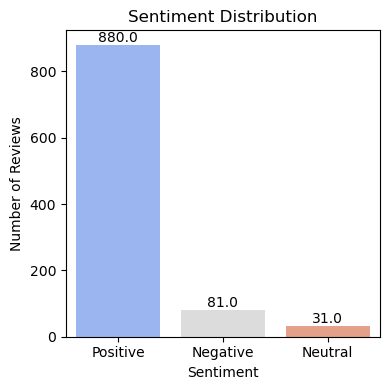

In [71]:
#  Count of Positive, Negative, and Neutral Reviews

plt.figure(figsize=(4,4))
ax = sns.countplot(data=df, x='sentiment', palette='coolwarm', hue='sentiment')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=10)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

In [77]:
df[df['sentiment'] == 'Positive']['reviewText'].iloc[0]

'We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that\'s just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!'

In [81]:
df[df['sentiment'] == 'Negative']['reviewText'].iloc[0]

"I've had mine for a year and here's what we got. It tries to route be down non truck routes while telling me the truck route is illegal for me. This is such a bad problem that even Interstate 25 in Denver Colorado is listed (according to this GPS) as a non- truck route and will route you through the city instead. There are several drivers within our company who own one and more than half (of about 50) have crashed to an un-recoverable state. Our company representative said that Rand McNally informed them that the GPS was not designed to say on for a long period of time. Really? it's a truck driver GPS. We have one driver with a $2400 dollar ticket due to this GPS routing him down the wrong road. The companies response was to update the unit. I've had mine for a year, I never noticed one update that corrected functionality, they only seem to keep messing the tools. I want a GPS that routes, if I wanted tools I'd buy software for my computer.My suggestion is to by a nice Garmen. My one 

In [83]:
df[df['sentiment'] == 'Neutral']['reviewText'].iloc[0]

"We bought this for the tv in our gym as it gets moved around a bit.  It's definitely sturdy and works well.  Our tv in there is 24&#34;,"

In [87]:
#Save the Result

df.to_csv('amazon_reviews_sentiment.csv', index=False)
print("Sentiment analysis results saved successfully!")

Sentiment analysis results saved successfully!


## Sentiment Analysis Task 4 Summary: amazon_reviews